# Chicago Crime Data Project: Part 1

**Steps:**

1. Use data from the Chicago Data Portal: Crimes 2001 to Present, which includes type of crime, date/time, lat/long, District/ward, arrests, etc.
    - https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

2. Use this data processing helper notebook to process large Chicago crime data .csv into several smaller .csv.gz files for analysis.
    - https://github.com/coding-dojo-data-science/preparing-chicago-crime-data

3. Answer several questions about the data. Questions:
    - (1) Comparing Police Districts: 
        - (A) Which district has the most crimes? 
        - (B) Which has the least?
    - (2) Crimes Across the Years:
        - (A) Is the total number of crimes increasing or decreasing across the years?
        - (B) Are there any individual crimes that are doing the opposite (i.e., decreasing when orverall crime is increasing or vice-versa)?
    - (3) Comparing AM vs. PM Rush Hour:
        - (A) Are crimes more common during AM rush hour or PM rush hour? Consider 7am-10am and 4pm-7pm as rush hours.
        - (B) What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
        - (C) Are MOtor Vehicle Thefts more common during AM rush hour or PM rush hour?
    - (4) Comparing Months:
        - (A) What months have the most crime? What months have the least?
        - (B) Are there any individual crimes that do not follow this pattern? If so, which crimes?
    - (5) Comparing Holidays:
        - (A) Are there any holidays that show an increase in the number of crimes?
        - (B) Are there any holidays that show a decrease in the number of crimes?

# 1 Imports

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import datetime as dt
from matplotlib import dates as mdates

# 2 Data Preparation

I downloaded the raw data from the Chicago Data Portal and processed it with the helper notebook in this repository. Here I will import the data that was saved in this repository and concatenate it back into one full dataframe. There is one saved .csv file for each year from 2001 to 2023 (inclusive). However, I will only use data from 2001 to 2022 (inclusive), since the 2023 data available now (in July 2023) is incomplete.

In [2]:
# import data into variables
def import_files():
    """Reads in .csv files from Data folder and names them
    dynamically with appropriate year"""
    
    # set file name template and years to use in file names
    file_name_template = "Chicago-Crime_{}"
    years = range(2001, 2023) # 2001-2022 (inclusive)
    
    # initialize dictionary to save files to
    data = {}
    
    # iterate through years
    for year in years:
        
        # recreate the file name
        file_name = file_name_template.format(year)
        
        # save file path based on file name
        file_path = f"Data/{file_name}.csv"
        
        # import as df
        df = pd.read_csv(file_path)
        
        # store in dictionary
        data[file_name] = df
        
        # replace dash (not allowed in python variable
        # names) with underscore
        # initialize new dictionary
        new_data = {}
            
        # loop through dict items
        for key, value in data.items():
            
            # if dash in key
            if "-" in key:
                
                # replace dash with underscore and save as new key
                new_key = key.replace("-", "_")
                
            # else new key is same as old key
            else:
                new_key = key
                
            # add new key with corresponding value to new dict
            new_data[new_key] = value
        
    # return dictionary
    return new_data

# call function and store in variable
imported_data = import_files()

# assign values to variables based on key names
for key, value in imported_data.items():
    globals()[key] = value
    
# check
display(Chicago_Crime_2001.head())
display(Chicago_Crime_2022.head())

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1422085,01/01/2001 01:00:00 AM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1023,10.0,NaN,41.858050,-87.695513
1,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.0,NaN,41.756650,-87.641608
3,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,41.822551,-87.615632
4,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,12584189,01/01/2022 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,133,1.0,4.0,41.839811,-87.617142
1,12581992,01/01/2022 01:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE - PORCH / HALLWAY,False,True,1125,11.0,27.0,41.876929,-87.686332
2,12581790,01/01/2022 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,734,7.0,16.0,41.766740,-87.663160
3,12582793,01/01/2022 01:00:00 AM,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1831,18.0,42.0,41.889453,-87.627995
4,12582293,01/01/2022 01:00:00 PM,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060


In [3]:
# put all dfs into list for concatenation
df_list = [globals()[name] for name in imported_data.keys() if isinstance(globals()[name], pd.DataFrame)]

# check
len(df_list)

22

In [4]:
# concatenate
df = pd.concat(df_list)

# check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7712324 entries, 0 to 238645
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1422085,01/01/2001 01:00:00 AM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1023,10.0,NaN,41.858050,-87.695513
1,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2,1310288,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.0,NaN,41.756650,-87.641608
3,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,41.822551,-87.615632
4,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929


In [5]:
# check for null values
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10167
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614847
Latitude                 87266
Longitude                87266
dtype: int64

In [6]:
# convert 'Date' column (now object) to datetime data type
df['Date'] = pd.to_datetime(df['Date'],
                           format = '%m/%d/%Y %I:%M:%S %p')

# check
df['Date']

0        2001-01-01 01:00:00
1        2001-01-01 13:00:00
2        2001-01-01 01:00:00
3        2001-01-01 13:00:00
4        2001-01-01 01:00:00
                 ...        
238641   2022-12-31 12:50:00
238642   2022-12-31 12:50:00
238643   2022-12-31 12:52:00
238644   2022-12-31 00:52:00
238645   2022-12-31 12:59:00
Name: Date, Length: 7712324, dtype: datetime64[ns]

In [7]:
# set the datetime column as the index
df_ts = df.set_index('Date')

# check
df_ts

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1422085,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1023,10.0,NaN,41.858050,-87.695513
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310288,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,621,6.0,NaN,41.756650,-87.641608
2001-01-01 13:00:00,6808288,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,41.822551,-87.615632
2001-01-01 01:00:00,1328315,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 12:52:00,12938420,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


We will keep two forms of the data. Above, in df_ts, we kept the original individual crime data with a datetime index (each row is one crime). Below, in resampled_df, we will created a resampled/converted crime counts version (each row is one day). 

In [8]:
# alternate code:
resampled_df = df_ts.copy()
# add 'Count' column with 1 for each row
resampled_df['Count'] = 1
# resample and count with .sum()
resampled_df = resampled_df.resample('D').sum(numeric_only = True)

# check
resampled_df.head()

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Count
Date,,,,,,,,,
2001-01-01,4011740634,400,289,2267987,21147.0,8194.0,72641.077994,-152199.715024,1825
2001-01-02,1545846568,383,146,1404493,12797.0,147.0,47664.670569,-99856.853277,1143
2001-01-03,1542074517,343,162,1462886,13359.0,132.0,48045.805839,-100651.350927,1151
2001-01-04,1555657957,377,131,1397040,12994.0,0.0,48785.523718,-102222.916683,1166
2001-01-05,1701884634,415,159,1530155,14044.0,156.0,52769.463977,-110554.590960,1267


We now have two dataframes, df_ts and resampled_df, to use to answer the questions below. 
- df_ts: each row is one crime
- resampled_df: each row is one day, and the number of crimes on that day appears in the 'Count' column

# 3 Questions and Answers

## 3.1 Question 1: Police Districts

To answer these questions, we will use our dataframe df_ts, which has one row for every crime.

### 3.1.1 Which district has the most crimes?

In [9]:
# look at a list of all the districts
print(df_ts['District'].nunique())
print(df_ts['District'].unique())

24
[10.  3.  6.  2.  7. 11. 19.  9. 15. 25. 14. 17. 24.  8. 16. 18.  5. 12.
 22.  4. 20.  1. 31. 21. nan]


There are 24 districts represented in the data but the highest district number is 31. This means we are missing some districts in the data or some district numbers don't exist. This should be investigated further in a real-world scenario. For now, we will move on.

In [10]:
# convert float district numbers to integers
df_ts['District'] = df_ts['District'].astype('Int64')

# check
df_ts['District']

Date
2001-01-01 01:00:00    10
2001-01-01 13:00:00     3
2001-01-01 01:00:00     6
2001-01-01 13:00:00     2
2001-01-01 01:00:00     7
                       ..
2022-12-31 12:50:00    10
2022-12-31 12:50:00     7
2022-12-31 12:52:00    14
2022-12-31 00:52:00    11
2022-12-31 12:59:00    15
Name: District, Length: 7712324, dtype: Int64

In [11]:
# crime count per district with .value_counts()
df_ts['District'].value_counts(dropna = False)

8       518480
11      495889
6       450604
7       447246
25      439110
4       437705
3       391023
12      381199
9       377272
2       364693
19      345900
18      345636
5       342073
10      332364
15      331441
1       310753
14      298767
16      257916
22      252700
24      232675
17      222495
20      136096
31         236
<NA>        47
21           4
Name: District, dtype: Int64

In [12]:
# percentage
df_ts['District'].value_counts(dropna = False,
                              normalize = True)

8       0.067227
11      0.064298
6       0.058426
7       0.057991
25      0.056936
4       0.056754
3       0.050701
12      0.049427
9       0.048918
2       0.047287
19       0.04485
18      0.044816
5       0.044354
10      0.043095
15      0.042976
1       0.040293
14      0.038739
16      0.033442
22      0.032766
24      0.030169
17      0.028849
20      0.017647
31      0.000031
<NA>    0.000006
21      0.000001
Name: District, dtype: Float64

District 8 has the most crimes of all the districts, with about 6.7% of all crimes reported there.

### 3.1.2 Which district has the least crimes?

District 21 has the least crimes of all the districts, with only 4 crimes reported there (out of a total of 120,604 reported crimes total).

### 3.1.3 Visualization

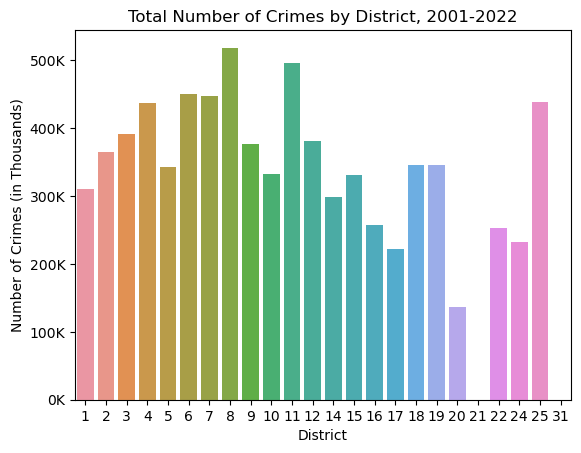

In [13]:
# function to format y-axis units
def thousands(x, pos):
    """formats money in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"

# set data
plot_series = df_ts['District'].value_counts(dropna = True)

# sns.barplot
ax = sns.barplot(x = plot_series.index,
                y = plot_series.values)

# create string format for y-axis units
fmt_thous = mticks.FuncFormatter(thousands)

# set y-axis major formatter
ax.yaxis.set_major_formatter(fmt_thous)

# set title and axes
ax.set_title('Total Number of Crimes by District, 2001-2022')
ax.set_ylabel('Number of Crimes (in Thousands)')
ax.set_xlabel('District')

# show
plt.show();

## 3.2 Question 2: Crimes Across the Years

### 3.2.1 Is the total number of crimes increasing or decreasing across the years?

In [14]:
# resample df_ts by year
years_ts = df_ts.resample('Y').size()

# check
years_ts

Date
2001-12-31    485885
2002-12-31    486804
2003-12-31    475983
2004-12-31    469421
2005-12-31    453772
2006-12-31    448177
2007-12-31    437087
2008-12-31    427169
2009-12-31    392824
2010-12-31    370501
2011-12-31    351971
2012-12-31    336272
2013-12-31    307474
2014-12-31    275740
2015-12-31    264772
2016-12-31    269805
2017-12-31    269091
2018-12-31    268801
2019-12-31    261284
2020-12-31    212160
2021-12-31    208685
2022-12-31    238646
Freq: A-DEC, dtype: int64

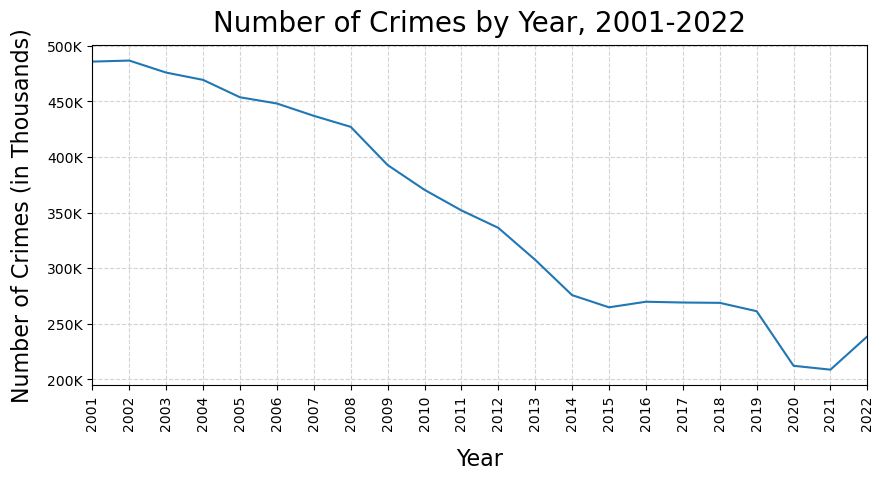

In [15]:
# set subplots
fig, ax = plt.subplots(figsize = (10, 5))

# Y-AXIS FORMATTING
# function to format y-axis units
def thousands(x, pos):
    """formats money in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"
# create string format for y-axis units
fmt_thous = mticks.FuncFormatter(thousands)
# set y-axis major formatter
ax.yaxis.set_major_formatter(fmt_thous)

# X-AXIS FORMATTING
# one tick every year
major_ticks_loc = mdates.YearLocator(1)
# 4-digit-year labels
major_ticks_format = mdates.DateFormatter('%Y')
# set locator and formatter
ax.xaxis.set_major_locator(major_ticks_loc)
ax.xaxis.set_major_formatter(major_ticks_format)

# plot
years_ts.plot(ax = ax)

# set title and axes labels
ax.set_title('Number of Crimes by Year, 2001-2022',
            fontsize = 20,
            pad = 10)
ax.set_ylabel('Number of Crimes (in Thousands)',
             fontsize = 16,
             labelpad = 10)
ax.set_xlabel('Year',
             fontsize = 16,
             labelpad = 12)

# rotate major tick labels on x-axis 90 degrees
fig.autofmt_xdate(which = 'major',
                 rotation = 90)

# make year labels on major ticks on x-axis centered
for label in ax.xaxis.get_majorticklabels():
    label.set_horizontalalignment('center')
    
# make year label show up on every major tick
years = pd.date_range(start = '2001', end = '2022', freq = 'AS')
plt.xticks(years, [year.year for year in years])

# add grid
ax.grid(color='lightgray', linestyle='--');

The total number of crimes has been decreasing across the years. We see that 2023 has the lowest number of crimes since 2001, but we don't have all the data for 2023 yet.

### 3.2.2 Are there any individual crimes that are doing the opposite (i.e., decreasing when orverall crime is increasing or vice-versa)?

In [16]:
# look at 'Primary Type' column from original df
df_ts['Primary Type'].value_counts()

THEFT                                1626956
BATTERY                              1410865
CRIMINAL DAMAGE                       878909
NARCOTICS                             746149
ASSAULT                               501098
OTHER OFFENSE                         479014
BURGLARY                              422245
MOTOR VEHICLE THEFT                   366583
DECEPTIVE PRACTICE                    340647
ROBBERY                               289674
CRIMINAL TRESPASS                     212866
WEAPONS VIOLATION                     103905
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55190
PUBLIC PEACE VIOLATION                 52085
SEX OFFENSE                            30336
CRIM SEXUAL ASSAULT                    27609
INTERFERENCE WITH PUBLIC OFFICER       18205
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13122
HOMICIDE                               12394
KIDNAPPING

To clean up the data a bit, I will combine the following:
- 'CRIM SEXUAL ASSAULT' and 'CRIMINAL SEXUAL ASSAULT' (as 'CRIMINAL SEXUAL ASSAULT')
- 'NON-CRIMINAL' and 'NON - CRIMINAL' and 'NON-CRIMINAL (SUBJECT SPECIFIED' (as 'NON-CRIMINAL')
- 'NARCOTICS' and 'OTHER NARCOTIC VIOLATION' (as 'NARCOTICS')

In [17]:
# clean up 'Primary Type' groupings
df_ts['Primary Type'] = df_ts['Primary Type'].replace({'CRIM SEXUAL ASSAULT': 'CRIMINAL SEXUAL ASSAULT',
                                                      'NON - CRIMINAL': 'NON-CRIMINAL',
                                                      'NON-CRIMINAL (SUBJECT SPECIFIED)': 'NON-CRIMINAL',
                                                      'OTHER NARCOTIC VIOLATION': 'NARCOTICS'})

# check
df_ts['Primary Type'].value_counts()

THEFT                                1626956
BATTERY                              1410865
CRIMINAL DAMAGE                       878909
NARCOTICS                             746296
ASSAULT                               501098
OTHER OFFENSE                         479014
BURGLARY                              422245
MOTOR VEHICLE THEFT                   366583
DECEPTIVE PRACTICE                    340647
ROBBERY                               289674
CRIMINAL TRESPASS                     212866
WEAPONS VIOLATION                     103905
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55190
PUBLIC PEACE VIOLATION                 52085
CRIMINAL SEXUAL ASSAULT                33913
SEX OFFENSE                            30336
INTERFERENCE WITH PUBLIC OFFICER       18205
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13122
HOMICIDE                               12394
KIDNAPPING

In [18]:
# check as percentages
df_ts['Primary Type'].value_counts(normalize = True)

THEFT                                2.109553e-01
BATTERY                              1.829364e-01
CRIMINAL DAMAGE                      1.139616e-01
NARCOTICS                            9.676668e-02
ASSAULT                              6.497367e-02
OTHER OFFENSE                        6.211020e-02
BURGLARY                             5.474939e-02
MOTOR VEHICLE THEFT                  4.753211e-02
DECEPTIVE PRACTICE                   4.416918e-02
ROBBERY                              3.755988e-02
CRIMINAL TRESPASS                    2.760076e-02
WEAPONS VIOLATION                    1.347259e-02
PROSTITUTION                         9.043967e-03
OFFENSE INVOLVING CHILDREN           7.156079e-03
PUBLIC PEACE VIOLATION               6.753477e-03
CRIMINAL SEXUAL ASSAULT              4.397248e-03
SEX OFFENSE                          3.933445e-03
INTERFERENCE WITH PUBLIC OFFICER     2.360508e-03
LIQUOR LAW VIOLATION                 1.924971e-03
GAMBLING                             1.895149e-03


I will combine all crimes with a Primary Type less than 1% of the overall crimes number with 'OTHER OFFENSE' to make the plot look cleaner and easier to read.

In [19]:
# specify crimes that count for less than 1%
to_replace = ['PROSTITUTION',
             'OFFENSE INVOLVING CHILDREN',
             'PUBLIC PEACE VIOLATION',
             'CRIMINAL SEXUAL ASSAULT',
             'SEX OFFENSE',
             'INTERFERENCE WITH PUBLIC OFFICER',
             'LIQUOR LAW VIOLATION',
             'GAMBLING',
             'ARSON',
             'HOMICIDE',
             'KIDNAPPING',
             'STALKING',
             'INTIMIDATION',
             'CONCEALED CARRY LICENSE VIOLATION',
             'OBSCENITY',
             'NON-CRIMINAL',
             'PUBLIC INDECENCY',
             'HUMAN TRAFFICKING',
             'RITUALISM',
             'DOMESTIC VIOLENCE']

# replace with 'OTHER OFFENSE'
df_ts['Primary Type'] = df_ts['Primary Type'].replace(to_replace, 'OTHER OFFENSE')

# check
df_ts['Primary Type'].value_counts()

THEFT                  1626956
BATTERY                1410865
CRIMINAL DAMAGE         878909
OTHER OFFENSE           812280
NARCOTICS               746296
ASSAULT                 501098
BURGLARY                422245
MOTOR VEHICLE THEFT     366583
DECEPTIVE PRACTICE      340647
ROBBERY                 289674
CRIMINAL TRESPASS       212866
WEAPONS VIOLATION       103905
Name: Primary Type, dtype: int64

In [20]:
# check with percentages
df_ts['Primary Type'].value_counts(normalize = True)

THEFT                  0.210955
BATTERY                0.182936
CRIMINAL DAMAGE        0.113962
OTHER OFFENSE          0.105322
NARCOTICS              0.096767
ASSAULT                0.064974
BURGLARY               0.054749
MOTOR VEHICLE THEFT    0.047532
DECEPTIVE PRACTICE     0.044169
ROBBERY                0.037560
CRIMINAL TRESPASS      0.027601
WEAPONS VIOLATION      0.013473
Name: Primary Type, dtype: float64

In [21]:
# make a copy
primarytype_ts = df_ts.copy()

# put a '1' in each row
primarytype_ts['Count'] = 1

# group crimes by 'Primary Type' and resample by year
primarytype_ts = primarytype_ts.groupby('Primary Type').resample('Y').sum(numeric_only = True)

# drop unnecessary columns
primarytype_ts = primarytype_ts.drop(columns = ['ID',
                                               'Arrest',
                                               'Domestic',
                                               'Beat',
                                               'District',
                                               'Ward',
                                               'Latitude',
                                               'Longitude'])

# check
primarytype_ts

Count
Primary Type      Date             
ASSAULT           2001-12-31  31384
                  2002-12-31  31523
                  2003-12-31  29477
                  2004-12-31  28850
                  2005-12-31  27067
...                             ...
WEAPONS VIOLATION 2018-12-31   5456
                  2019-12-31   6339
                  2020-12-31   8432
                  2021-12-31   8980
                  2022-12-31   8766

[264 rows x 1 columns]

In [22]:
# use unstack to get plot with different lines for
# different primary types
unstacked = primarytype_ts.unstack(level = 0)

# check
unstacked

Count                                                     \
Primary Type ASSAULT BATTERY BURGLARY CRIMINAL DAMAGE CRIMINAL TRESPASS   
Date                                                                      
2001-12-31     31384   93460    26014           55858             13241   
2002-12-31     31523   94153    25623           55941             13880   
2003-12-31     29477   88380    25157           55011             14807   
2004-12-31     28850   87136    24564           53164             15913   
2005-12-31     27067   83964    25503           54548             16655   
2006-12-31     25945   80666    24324           57124             14505   
2007-12-31     26313   79593    24858           53749             13699   
2008-12-31     25449   75926    26218           52842             12310   
2009-12-31     22861   68460    26767           47725             10851   
2010-12-31     21537   65402    26422           40653              9401   
2011-12-31     20411   60459    26620           37332              8659   
2012-12-31     19900   59134    22845           35855              8216   
2013-12-31     17972   54006    17895           30855              8136   
2014-12-31     16903   49452    14569           27798              7539   
2015-12-31     17048   48923    13184           28676              6401   
2016-12-31     18742   50299    14289           31018              6306   
2017-12-31     19306   49239    13001           29045              6814   
2018-12-31     20406   49828    11746           27824              6908   
2019-12-31     20620   49519     9638           26681              6818   
2020-12-31     18254   41512     8757           24878              4177   
2021-12-31     20342   40459     6659           25094              3406   
2022-12-31     20788   40895     7592           27238              4224   

                                                                             \
Primary Type DECEPTIVE PRACTICE MOTOR VEHICLE THEFT NARCOTICS OTHER OFFENSE   
Date                                                                          
2001-12-31                14948               27553     50573         50859   
2002-12-31                13731               25121     51794         53902   
2003-12-31                13459               22748     54290         52235   
2004-12-31                13255               22805     57069         50926   
2005-12-31                13590               22497     56243         47868   
2006-12-31                13606               21818     55822         48338   
2007-12-31                14170               18573     54466         47506   
2008-12-31                14931               18881     46519         45078   
2009-12-31                13876               15482     43549         42139   
2010-12-31                12572               19029     43400         37350   
2011-12-31                12725               19388     38610         34751   
2012-12-31                13763               16492     35495         31714   
2013-12-31                13914               12582     34132         31383   
2014-12-31                15952                9911     29128         30007   
2015-12-31                16439               10068     23944         29737   
2016-12-31                19338               11286     13337         28159   
2017-12-31                19671               11380     11694         27992   
2018-12-31                19822                9985     13591         28269   
2019-12-31                19023                8977     15080         28104   
2020-12-31                18281                9959      7498         21237   
2021-12-31                17297               10601      5339         21798   
2022-12-31                16284               21447      4723         22928   

                                               
Primary Type ROBBERY  THEFT WEAPONS VIOLATION  
Date                                           
2001-12-31     1844

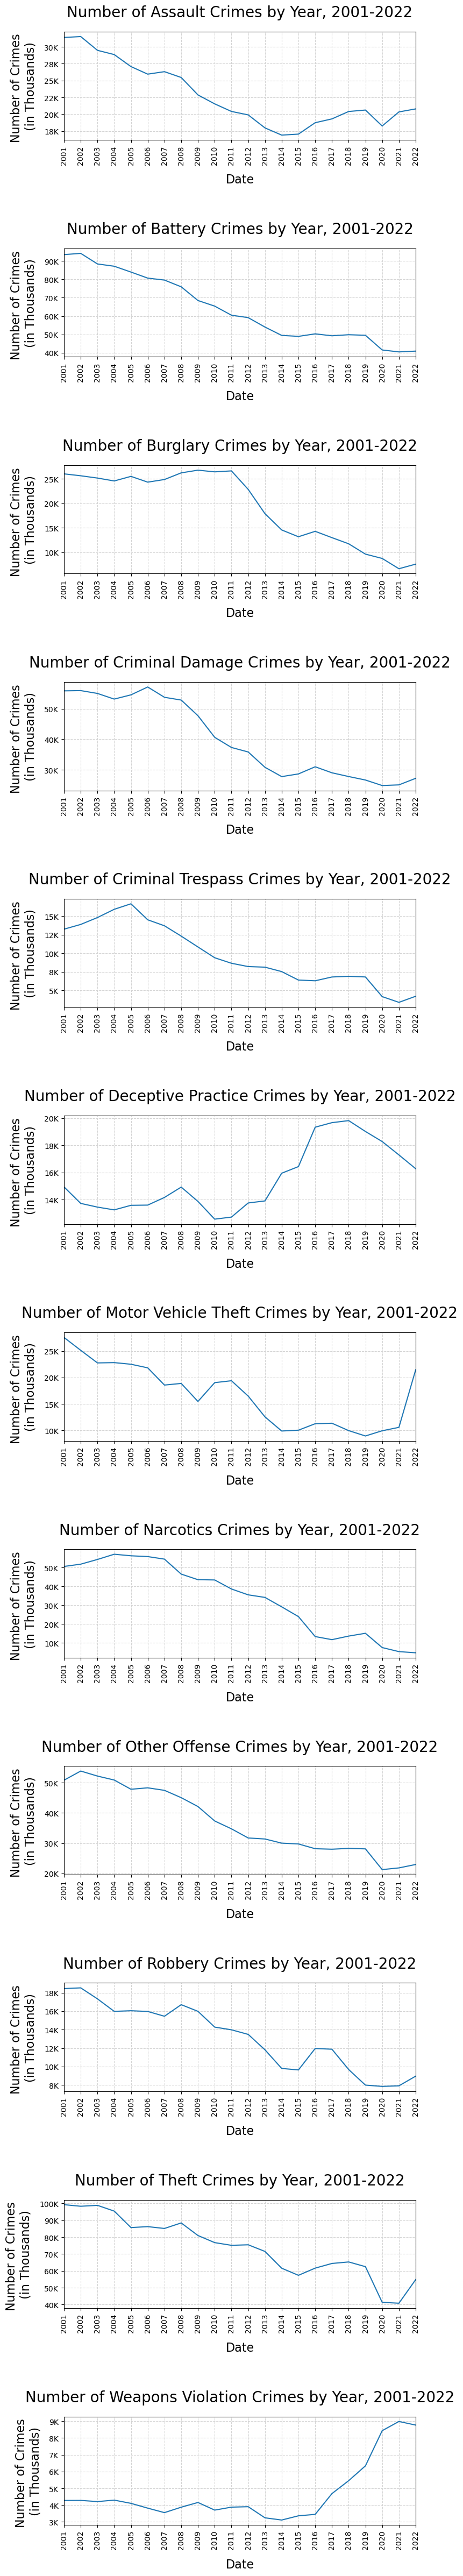

In [23]:
# plot each 'Primary Type' separately
# (plotting together is too busy; can't see
# trends of some of the lines)

# function to format y-axis units
def thousands(x, pos):
    """formats money in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"

# subplots
fig, axes = plt.subplots(len(unstacked.columns),
                        1,
                        figsize = (8, 4 * len(unstacked.columns)),
                        sharex = False)

# loop through each column and plot
for i, column in enumerate(unstacked.columns):
    ax = axes[i]
    
    # Y-AXIS FORMATTING
    # create string format for y-axis units
    fmt_thous = mticks.FuncFormatter(thousands)
    # set y-axis major formatter
    ax.yaxis.set_major_formatter(fmt_thous)

    # X-AXIS FORMATTING
    # one tick every year
    major_ticks_loc = mdates.YearLocator(1)
    # 4-digit-year labels
    major_ticks_format = mdates.DateFormatter('%Y')
    # set locator and formatter
    ax.xaxis.set_major_locator(major_ticks_loc)
    ax.xaxis.set_major_formatter(major_ticks_format)

    # set title and axes
    ax.set_title(f'Number of {column[1].title()} Crimes by Year, 2001-2022',
                fontsize = 20,
                pad = 20)
    ax.set_ylabel('Number of Crimes \n(in Thousands)',
                 fontsize = 16,
                 labelpad = 10)
    ax.set_xlabel('Year',
                 fontsize = 16,
                 labelpad = 12)

    # plot
    unstacked[column].plot(ax = ax)
    
    # rotate x-axis tick labels
    ax.tick_params(axis = 'x', rotation = 90)

    # make year labels on major ticks on x-axis centered
    for label in ax.xaxis.get_majorticklabels():
        label.set_horizontalalignment('center')
        
    # make year label show up on every major tick
    years = pd.date_range(start = '2001', end = '2022', freq = 'AS')
    ax.set_xticks(years)
    ax.set_xticklabels([year.year for year in years])

    
    # add grid
    ax.grid(color='lightgray', linestyle='--')

# plot adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace = 1)
    
# show
plt.show();

Yes, there are several types of crimes that show a dissimilar trend to the overall decrease in crimes from 2001-2022.

The primary types of crime that show the most different trends are:
- Deceptive Practice Crimes: risen overall since 2001, although has been on slight downward trajectory since 2018
- Motor Vehicle Theft: overall downward trend since 2001 but 2022 saw severe upward spike
- Weapons Violation: relative plateau from 2001 to 2016, and has sharply risen since

Some other primary types of crimes show interesting aspects, but still have a downward trend since 2001:
- Assault: downward trend over all 23 years but rising slightly since 2014
- Burglary: downward trend since 2011
- Criminal Damage Crimes: downward trend over all 23 years but has plateaued since 2014
- Criminal Trespass: downward trend since 2005

## 3.3 Question 3: AM vs. PM Rush Hour

### 3.3.1 Are crimes more common during AM rush hour or PM rush hour? Consider 7am-10am and 4pm-7pm as rush hours.

### 3.3.2 What are the top 5 most common crimes during AM rush hour?

### 3.3.3 What are the top 5 most common crimes during PM rush hour?

### 3.3.4 Are Motor Vehicle Thefts more common during AM rush hour or PM rush hour?

## 3.4 Question 4: Months

### 3.4.1 What months have the most crime?

In [24]:
# copy original data
months_df = df.copy()

# slice out the month
months_df['Month'] = months_df['Date'].dt.month_name()

# check
months_df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [25]:
# get data for plotting
plot_series = months_df['Month'].value_counts(dropna = False)

# check
plot_series

July         717167
August       710369
May          682870
June         681707
October      676213
September    668182
March        629640
April        627129
November     608903
January      601130
December     579675
February     529339
Name: Month, dtype: int64

In [26]:
# re-order the months to be in calendar year order
desired_order = ['January',
                'February',
                'March',
                'April',
                'May',
                'June',
                'July',
                'August',
                'September',
                'October',
                'November',
                'December']

plot_series = plot_series.reindex(desired_order)

# check
plot_series

January      601130
February     529339
March        629640
April        627129
May          682870
June         681707
July         717167
August       710369
September    668182
October      676213
November     608903
December     579675
Name: Month, dtype: int64

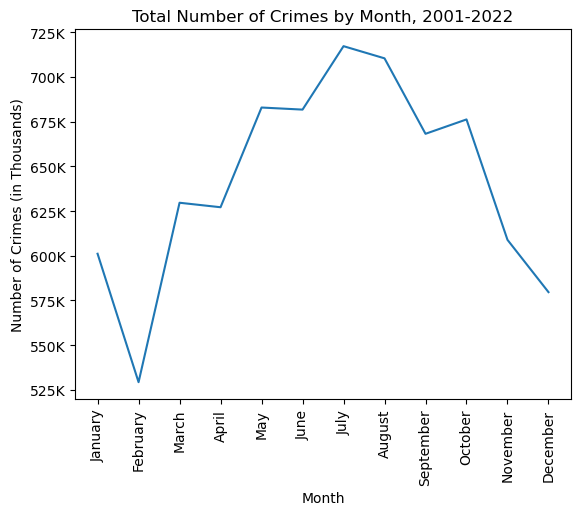

In [27]:
# function to format y-axis units
def thousands(x, pos):
    """formats money in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"

# sns.barplot
ax = sns.lineplot(x = plot_series.index,
                y = plot_series.values)

# create string format for y-axis units
fmt_thous = mticks.FuncFormatter(thousands)

# set y-axis major formatter
ax.yaxis.set_major_formatter(fmt_thous)

# set title and axes
ax.set_title('Total Number of Crimes by Month, 2001-2022')
ax.set_ylabel('Number of Crimes (in Thousands)')
ax.set_xlabel('Month')

# rotate x-ticks
plt.xticks(rotation = 90, ha = 'center')

# show
plt.show();

The top two months with the most total crimes from 2001 to 2022 are July and August, both summer months.

### 3.4.2 What months have the least crime?

The winter months February, December, and January are the months with the fewest total crimes from 2001-2022. February has the least crimes out of all the months.

### 3.4.3 Are there any individual crimes that do not follow this pattern? If so, which crimes?

We will first clean up the 'Primary Type' groupings as we did for question 3.2 above.

In [28]:
# clean up 'Primary Type' groupings
months_df['Primary Type'] = months_df['Primary Type'].replace({'CRIM SEXUAL ASSAULT': 'CRIMINAL SEXUAL ASSAULT',
                                                              'NON - CRIMINAL': 'NON-CRIMINAL',
                                                              'NON-CRIMINAL (SUBJECT SPECIFIED)': 'NON-CRIMINAL',
                                                              'OTHER NARCOTIC VIOLATION': 'NARCOTICS'})

# specify crimes that count for less than 1%
to_replace = ['PROSTITUTION',
             'OFFENSE INVOLVING CHILDREN',
             'PUBLIC PEACE VIOLATION',
             'CRIMINAL SEXUAL ASSAULT',
             'SEX OFFENSE',
             'INTERFERENCE WITH PUBLIC OFFICER',
             'LIQUOR LAW VIOLATION',
             'GAMBLING',
             'ARSON',
             'HOMICIDE',
             'KIDNAPPING',
             'STALKING',
             'INTIMIDATION',
             'CONCEALED CARRY LICENSE VIOLATION',
             'OBSCENITY',
             'NON-CRIMINAL',
             'PUBLIC INDECENCY',
             'HUMAN TRAFFICKING',
             'RITUALISM',
             'DOMESTIC VIOLENCE']

# replace with 'OTHER OFFENSE'
months_df['Primary Type'] = months_df['Primary Type'].replace(to_replace, 'OTHER OFFENSE')

# check
months_df['Primary Type'].value_counts()

THEFT                  1626956
BATTERY                1410865
CRIMINAL DAMAGE         878909
OTHER OFFENSE           812280
NARCOTICS               746296
ASSAULT                 501098
BURGLARY                422245
MOTOR VEHICLE THEFT     366583
DECEPTIVE PRACTICE      340647
ROBBERY                 289674
CRIMINAL TRESPASS       212866
WEAPONS VIOLATION       103905
Name: Primary Type, dtype: int64

In [29]:
# check as percentages
months_df['Primary Type'].value_counts(normalize = True)

THEFT                  0.210955
BATTERY                0.182936
CRIMINAL DAMAGE        0.113962
OTHER OFFENSE          0.105322
NARCOTICS              0.096767
ASSAULT                0.064974
BURGLARY               0.054749
MOTOR VEHICLE THEFT    0.047532
DECEPTIVE PRACTICE     0.044169
ROBBERY                0.037560
CRIMINAL TRESPASS      0.027601
WEAPONS VIOLATION      0.013473
Name: Primary Type, dtype: float64

In [30]:
# use groupby to see crimes broken down by 'Primary Type' and 'Month'
months_primarytype_series = months_df.groupby(['Primary Type', 'Month']).size()

# check
months_primarytype_series

Primary Type       Month    
ASSAULT            April        42031
                   August       46455
                   December     34322
                   February     33416
                   January      34818
                                ...  
WEAPONS VIOLATION  March         8170
                   May           9938
                   November      7952
                   October       9190
                   September     9435
Length: 144, dtype: int64

In [31]:
# unstack
unstacked = months_primarytype_series.unstack(level = 0)

# check
unstacked

Primary Type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,OTHER OFFENSE,ROBBERY,THEFT,WEAPONS VIOLATION
Month,,,,,,,,,,,,
April,42031,118499,31372,75103,17737,27674,27909,63000,68849,20907,125640,8408
August,46455,128732,40596,81709,18564,29169,32727,64418,71780,27394,158938,9887
December,34322,98363,35635,63129,15803,29986,32008,53935,56708,25749,126636,7401
February,33416,93599,25652,55428,16679,25368,25130,63933,61514,17271,104949,6400
January,34818,101299,32639,62574,18470,30249,30241,65950,70097,23411,123448,7934
July,47900,136814,39279,83395,18029,28520,32666,61950,72520,27243,159063,9788
June,47255,135908,35958,78920,17492,28255,30414,59018,71269,24407,143409,9402
March,41710,117868,30072,71872,18734,28615,28738,69138,70800,20190,123733,8170
May,48454,135676,36066,79683,18379,27528,29635,63185,73116,23707,137503,9938


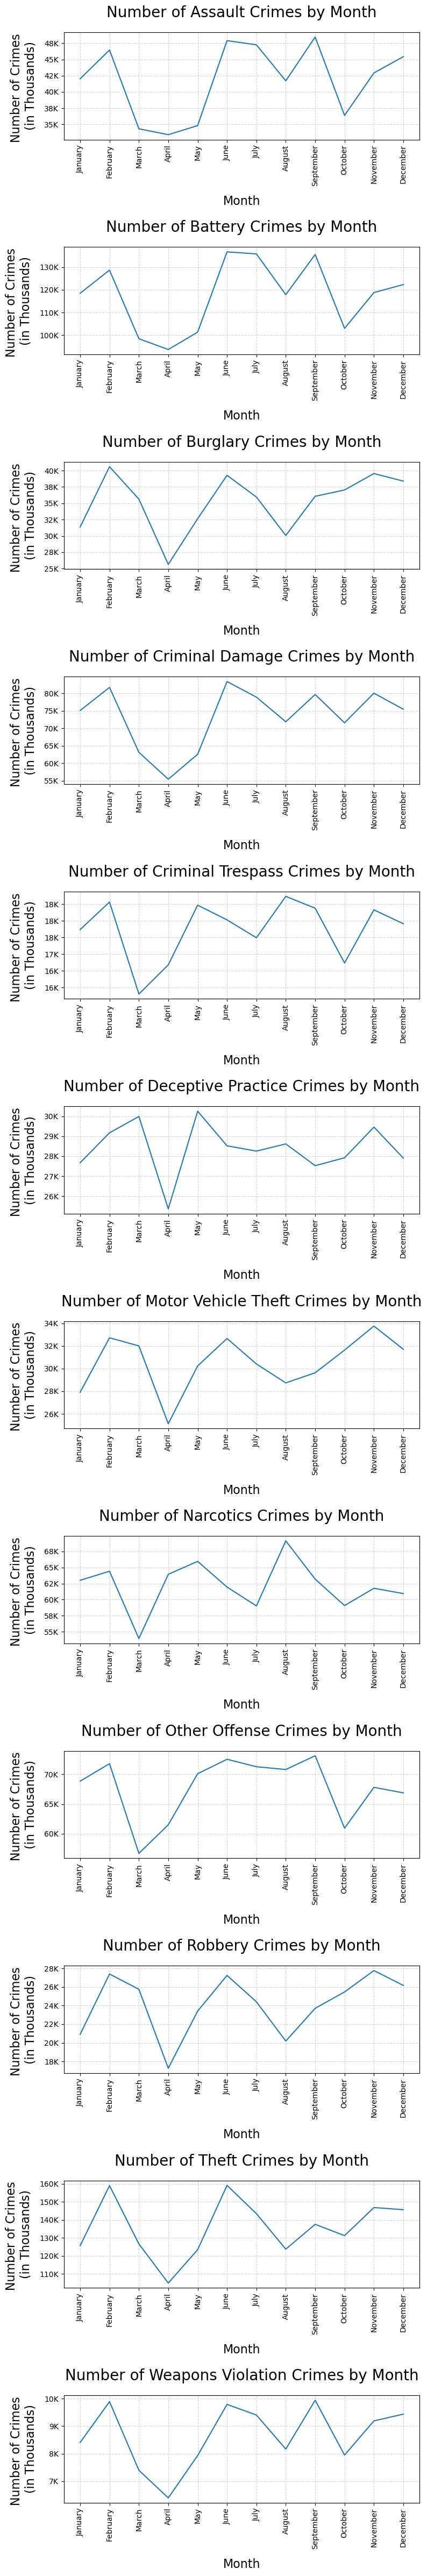

In [32]:
# plot each 'Primary Type' separately
# (plotting together is too busy; can't see
# trends of some of the lines)

# function to format y-axis units
def thousands(x, pos):
    """formats money in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"

# subplots
fig, axes = plt.subplots(len(unstacked.columns),
                        1,
                        figsize = (8, 4 * len(unstacked.columns)),
                        sharex = False)

# loop through each column and plot
for i, column in enumerate(unstacked):
    ax = axes[i]
    
    # Y-AXIS FORMATTING
    # create string format for y-axis units
    fmt_thous = mticks.FuncFormatter(thousands)
    # set y-axis major formatter
    ax.yaxis.set_major_formatter(fmt_thous)

    # X-AXIS FORMATTING
    # convert month names to datetime objects
    month_datetime = pd.to_datetime(unstacked.index, format = '%B').sort_values()
    # get the numerical position for each month
    x_ticks = range(len(unstacked))
    # assign month names as labels
    x_labels = [m.strftime('%B') for m in month_datetime]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels, rotation = 90)
    
    # set title and axes
    ax.set_title(f'Number of {column.title()} Crimes by Month',
                fontsize = 20,
                pad = 20)
    ax.set_ylabel('Number of Crimes \n(in Thousands)',
                 fontsize = 16,
                 labelpad = 10)
    ax.set_xlabel('Month',
                 fontsize = 16,
                 labelpad = 12)

    # plot
    # unstacked[column].plot(ax = ax)
    ax.plot(x_ticks, unstacked[column])
    
    # rotate x-axis tick labels
    ax.tick_params(axis = 'x', rotation = 90)

    # make year labels on major ticks on x-axis centered
    for label in ax.xaxis.get_majorticklabels():
        label.set_horizontalalignment('center')
    
    # add grid
    ax.grid(color='lightgray', linestyle='--')

# plot adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace = 1)
    
# show
plt.show();

There are many individual crimes (identified by 'Primary Type') that do not follow the pattern of all crimes put together over the course of the months in a year. Many of the individual crime plots above show that the lowest number of crimes are committed in April or Spring in general, while the highest number of crimes are committed at various months of the year.

## 3.5 Question 5: Holidays

### 3.5.1 Are there any holidays that show an increase in the number of crimes?

### 3.5.2 Are there any holidays that show a decrease in the number of crimes?